<a href="https://colab.research.google.com/github/Hab-eeb/08-weather-conditions/blob/master/data/EDA_and_Pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

 Importing the csv file, The link was gotten from the raw format offered by GitHub.

In [2]:
weatherdf = pd.read_csv("https://raw.githubusercontent.com/HamoyeHQ/08-weather-conditions/master/data/Summary%20of%20Weather.csv")

In [3]:
locationdf =  pd.read_csv("https://raw.githubusercontent.com/HamoyeHQ/08-weather-conditions/master/data/Weather%20Station%20Locations.csv")

In [4]:
locationdf.head(3)

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667


In [5]:
locationdf.isna().sum()

WBAN                0
NAME                0
STATE/COUNTRY ID    0
LAT                 0
LON                 0
ELEV                0
Latitude            0
Longitude           0
dtype: int64

In [6]:
weatherdf.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Percent of Missing Values')

Text(0.5, 1.0, 'Percentage of Missing Data by Feature')

,Total,Percent
WTE,119040,1.0
ITH,119040,1.0
RVG,119040,1.0
FB,119040,1.0
FTI,119040,1.0


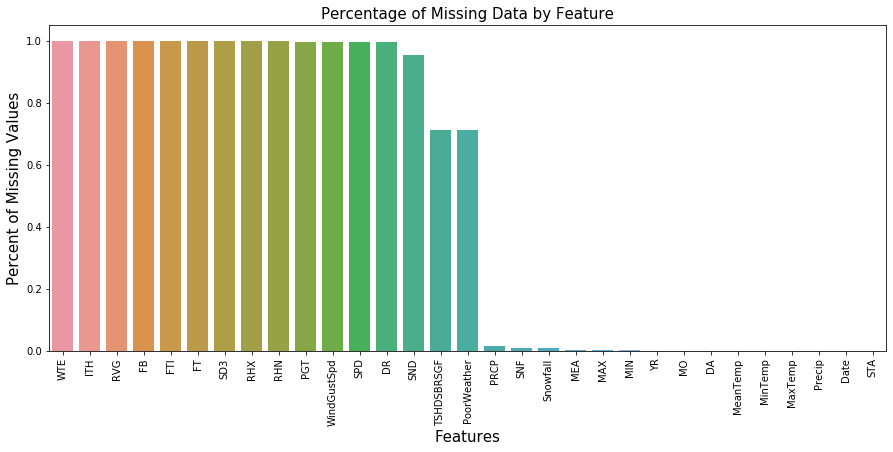

In [7]:
total = weatherdf.isnull().sum().sort_values(ascending=False)
percent = (weatherdf.isnull().sum()/weatherdf.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Percentage of Missing Data by Feature', fontsize=15)
missing_data.head()

In [8]:
#dropping all column with more than 80% nan
#from the kaggle description
# TSHDSBRSGF is the same as Poor weather so will drop it

weatherdf.drop(["DR", 'SPD','WindGustSpd', 'PGT', "TSHDSBRSGF",'RHN', 'RHX', "SND", 'SD3', "FT", "FTI", "FB", 'RVG', 'ITH', 'WTE'], 
                    axis =1 , inplace=True)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Percent of Missing Values')

Text(0.5, 1.0, 'Percentage of Missing Data by Feature')

,Total,Percent
PoorWeather,84803,0.712391
PRCP,1932,0.016230
SNF,1163,0.009770
Snowfall,1163,0.009770
MEA,498,0.004183


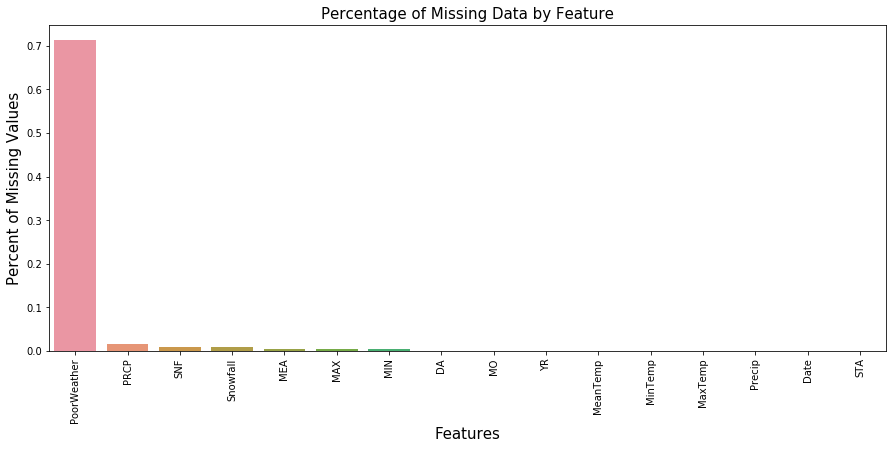

In [9]:
total = weatherdf.isnull().sum().sort_values(ascending=False)
percent = (weatherdf.isnull().sum()/weatherdf.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Percentage of Missing Data by Feature', fontsize=15)
missing_data.head()

Data was taken from https://www.ncdc.noaa.gov/data-access/land-based-station-data/land-based-datasets/world-war-ii-era-data
From the description:

MAX            MAXIMUM TEMPERATURE        FAHRENHEIT

MIN            MINIMUM TEMPERATURE        FAHRENHEIT

MEA            MEAN TEMPERATURE           FAHRENHEIT

which is similar to 

MaxTemp            MAXIMUM TEMPERATURE        Celsius

MinTemp           MINIMUM TEMPERATURE        Celsius

MeanTemp          MEAN TEMPERATURE           Celsius

hence we would drop MAX, MIN and MEA


In [10]:
weatherdf.drop(["MIN", "MAX", "MEA"], axis =1 , inplace=True)

In [11]:
weatherdf.head(2)
weatherdf.isna().sum()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,SNF
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,0
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,0


STA                0
Date               0
Precip             0
MaxTemp            0
MinTemp            0
MeanTemp           0
Snowfall        1163
PoorWeather    84803
YR                 0
MO                 0
DA                 0
PRCP            1932
SNF             1163
dtype: int64

we cant drop nan since we are dealin with time, it could cause a
gap in the dataset. we need all observations.

For the nan in PRCP, SNF and Snowfall, which is less than 10%, we would just use the pervious value data.
based on what we know weather in the same period are usually the same as yesterday 80% of the time. 
Just a logical and reasonable guess

In [12]:
weatherdf.Snowfall = pd.DataFrame(weatherdf.Snowfall.fillna(method="bfill",axis=0).fillna(0))

I think we could also drop PRCP and SNF because

PRCP          24-HOUR PRECIPITATION      INCHES & HUNDREDTHS

SNF            SNOWFALL (INCLUDES         INCHES & TENTHS
               ICE PELLETS)
               
based on https://www.ncdc.noaa.gov/data-access/land-based-station-data/land-based-datasets/world-war-ii-era-data 

In [13]:
weatherdf[["PRCP", "SNF"]] = pd.DataFrame(weatherdf[["PRCP", "SNF"]].fillna(method="bfill",axis=0).fillna(0))

In [14]:
weatherdf.isna().sum()

STA                0
Date               0
Precip             0
MaxTemp            0
MinTemp            0
MeanTemp           0
Snowfall           0
PoorWeather    84803
YR                 0
MO                 0
DA                 0
PRCP               0
SNF                0
dtype: int64

For the poor weather. from description. It is judge based on how 
TSHDSBRSGF     DAY WITH:  THUNDER         0 = NO
                          SLEET           1 = YES
                          HAIL
                          DUST OR SAND
                          SMOKE OR HAZE
                          BLOWING SNOW
                          RAIN
                          SNOW
                          GLAZE
                          FOG
                          
                   thus if snowfall == 0 the poor weather is 0

In [15]:
weatherdf["PoorWeather"] = np.where(weatherdf['Snowfall']!= 0, 1, 0)
weatherdf.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,SNF
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0,0,42,7,1,0.04,0
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,0,0,42,7,2,0,0
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,0,0,42,7,3,0.1,0
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,0,0,42,7,4,0.1,0
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,0,0,42,7,5,0,0


In [16]:
weatherdf.isna().sum()

STA            0
Date           0
Precip         0
MaxTemp        0
MinTemp        0
MeanTemp       0
Snowfall       0
PoorWeather    0
YR             0
MO             0
DA             0
PRCP           0
SNF            0
dtype: int64

In [ ]:
thats it